<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/MalarisImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
!unzip  "/content/cell_images.zip" -d "/content"

In [3]:
from matplotlib.image import imread

In [4]:
data_dir = '/content/cell_images'

In [5]:
train_path = '/content/cell_images/train/'
test_path = '/content/cell_images/test/'

In [6]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [7]:
os.listdir(train_path+'parasitized')[0]

'C99P60ThinF_IMG_20150918_142128_cell_97.png'

In [139]:
para_cell=train_path+'uninfected/'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'


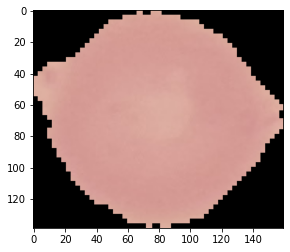

In [140]:
plt.imshow(imread(para_cell))

In [10]:
len(os.listdir(train_path+'parasitized')), len(os.listdir(train_path+'uninfected'))

(12480, 12480)

In [11]:
len(os.listdir(test_path+'parasitized')), len(os.listdir(test_path+'uninfected'))

(1300, 1300)

In [12]:
dim1 = []
dim2 = []

for image_file in os.listdir(test_path+'uninfected'):
  img= imread(test_path+'uninfected/'+image_file)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


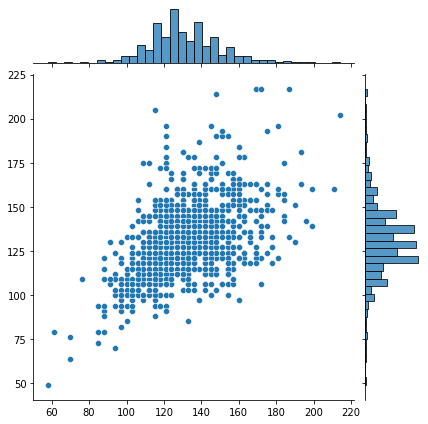

In [13]:
sns.jointplot(dim1,dim2)

In [14]:
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [15]:
image_shape = (130,130,3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen =  ImageDataGenerator(rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True,
                                fill_mode='nearest')

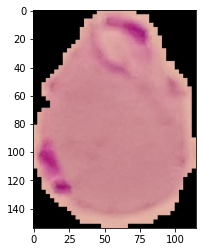

In [21]:
para_img=imread(para_cell)
plt.imshow(para_img)

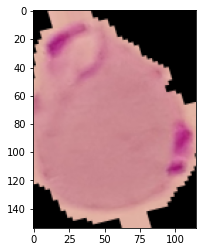

In [25]:
plt.imshow(image_gen.random_transform(para_img))

In [27]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(130,130,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(130,130,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(130,130,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
               metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(130,130),
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [45]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [89]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [47]:
results = model.fit_generator(train_image_gen,
                              epochs=25,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
1560/1560 [==============================] - 137s 82ms/step - loss: 0.9241 - accuracy: 0.5479 - val_loss: 0.6774 - val_accuracy: 0.5754
Epoch 2/25
1560/1560 [==============================] - 127s 82ms/step - loss: 0.6792 - accuracy: 0.5773 - val_loss: 0.6756 - val_accuracy: 0.5904
Epoch 3/25
1560/1560 [==============================] - 128s 82ms/step - loss: 0.6734 - accuracy: 0.5897 - val_loss: 0.6632 - val_accuracy: 0.6104
Epoch 4/25
1560/1560 [==============================] - 127s 81ms/step - loss: 0.6708 - accuracy: 0.6015 - val_loss: 0.6688 - val_accuracy: 0.5927
Epoch 5/25
1560/1560 [==============================] - 127s 81ms/step - loss: 0.4927 - accuracy: 0.7700 - val_loss: 0.1991 - val_accuracy: 0.9262
Epoch 6/25
1560/1560 [==============================] - 127s 81ms/step - loss: 0.1979 - accuracy: 0.9362 - val_loss: 0.1867 - val_accuracy: 0.9388
Epoch 7/25
1560/1560 [==============================] - 127s 81ms/step - loss: 0.1882 - accuracy: 0.9413 - val_loss: 0

In [50]:
losses = pd.DataFrame(model.history.history)

In [51]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.924052,0.547880,0.677396,0.575385
1,0.679206,0.577290,0.675627,0.590385
2,0.673356,0.589711,0.663174,0.610385
3,0.670797,0.601531,0.668783,0.592692
4,0.492683,0.770014,0.199090,0.926154
5,0.197927,0.936173,0.186709,0.938846
6,0.188237,0.941261,0.208516,0.936538
7,0.191997,0.940420,0.179338,0.942308
8,0.186856,0.942423,0.182549,0.943846
9,0.184893,0.942183,0.186490,0.941923


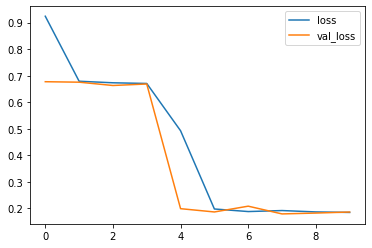

In [52]:
losses[['loss','val_loss']].plot()

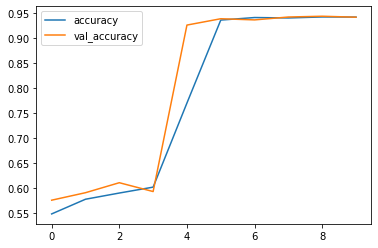

In [53]:
losses[['accuracy','val_accuracy']].plot()

In [54]:
model.evaluate_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.1812364012002945, 0.9461538195610046]

In [115]:
pred = model.predict_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [128]:

pred_probabilities = model.predict_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [129]:
pred_probabilities

array([[2.7079784e-04],
       [7.8312496e-07],
       [1.6283498e-06],
       ...,
       [9.1926152e-01],
       [8.7322253e-01],
       [9.2154789e-01]], dtype=float32)

In [130]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [131]:
predictions = pred_probabilities > 0.5

In [123]:
predictions = (model.predict(test_image_gen) > 0.5).astype("int32")

163/163 [==============================] - 12s 71ms/step


In [124]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [126]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1211,   89],
       [  58, 1242]])

In [141]:
para_cell

'/content/cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [142]:
from tensorflow.keras.preprocessing import image

In [143]:
my_image = image.load_img(para_cell,target_size=(130,130,3))

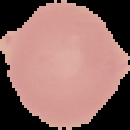

In [144]:
my_image

In [145]:
my_img_arr=image.img_to_array(my_image)

In [146]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [147]:
my_img_arr = my_img_arr/255

In [148]:
my_img_arr.min()

0.0

In [149]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 18ms/step


array([[0.78268707]], dtype=float32)